In [2]:
import pyart
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
from pyart.io import sband_archive
from pyart.graph import crfmapdisplay
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
# Read many S-band radars

files = {'filenames':['/home/xin/Documents/GD_convection/radar/20150601/2015_220_Guangzhou/220_Z_RADR_I_Z9200_20150601053000_O_DOR_SA_CAP.bin.bz2',
                    '/home/xin/Documents/GD_convection/radar/20150601/2015_224_Yangjiang/224_Z_RADR_I_Z9662_20150601053000_O_DOR_SA_CAP.bin.bz2',
                    '/home/xin/Documents/GD_convection/radar/20150601/2015_222_Meizhou/222_Z_RADR_I_Z9753_20150601053000_O_DOR_SA_CAP.bin.bz2'],
        'lon': [113.355,111.979,115.99],
        'lat': [23.004,21.846,24.258],
        'alt': [146.5,101.6,423]
        }

radars = [sband_archive.read_sband_archive(file,files['lon'][counter],files['lat'][counter],files['alt'][counter])\
         for counter, file in enumerate(files['filenames'])]

# Set gatefilter
gatefilter = ()
for radar in radars:
    # mask out last 10 gates of each ray, this removes the "ring" around th radar.
    radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

    # exclude masked gates from the gridding
    gatefilter_tmp = pyart.filters.GateFilter(radar)
    gatefilter_tmp.exclude_transition()
    gatefilter_tmp.exclude_masked('reflectivity')
    gatefilter += (gatefilter_tmp,)

/home/xin/Software/anaconda3/lib/python3.6/site-packages/pyart/io/sband_archive.py:204: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


In [4]:
# Set norm and cmap for plotting

norm = matplotlib.colors.Normalize(vmin=0,vmax=80)
cmap = matplotlib.colors.ListedColormap(['#00FFFF','#009DFF','#0000FF','#0982AF','#00FF00',\
'#08AF14','#FFD600','#FF9800','#FF0000','#DD001B','#BC0036',\
'#79006D','#7933A0','#C3A3D4','#FFFFFF'])

# Add shapefile
CHNshp = '/home/xin/Research/python/shapefile/data/CHN_adm_shp/CHN_adm2'

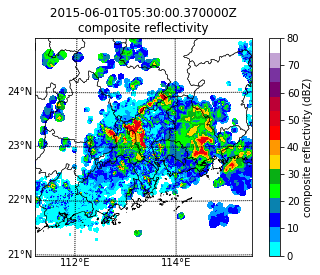

In [5]:
# Plot CRF

crfmapdisplay.plot_crf(radars,'reflectivity', grid_shape=(20, 800, 800),
                        grid_limits=((0.2, 15000), (-223000.0, 223000.0), (-223000.0, 223000.0)),
                        gatefilter=gatefilter,
                        vmin=0, vmax=80, norm=norm, cmap=cmap, shapefile=CHNshp,
                        # min_lon=110, max_lon=118, min_lat=20, max_lat=26, # If you don't set,
                        # this fuction can generate range automatically
                        lon_lines=np.arange(112, 118, 2), projection='lcc',
                        lat_lines=np.arange(20, 26, 1), resolution='h',
                        lat_0=radars[0].latitude['data'][0],
                        lon_0=radars[0].longitude['data'][0])

plt.show()

/home/xin/Software/anaconda3/lib/python3.6/site-packages/pyart/io/sband_archive.py:204: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


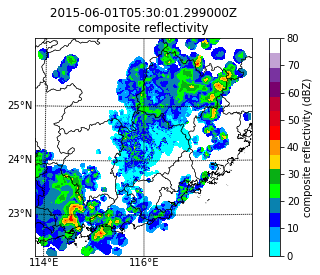

In [6]:
# If you want to plot CRF of one S-band radar, just change files.
files = {'filenames':['/home/xin/Documents/GD_convection/radar/20150601/2015_222_Meizhou/222_Z_RADR_I_Z9753_20150601053000_O_DOR_SA_CAP.bin.bz2'],
        'lat': [24.258],
        'lon': [115.99],
        'alt': [423],
        }

# You can change the remaining part accoring to yourself, especially plot_crf part.

radars = [sband_archive.read_sband_archive(file,files['lon'][counter],files['lat'][counter],files['alt'][counter])\
         for counter, file in enumerate(files['filenames'])]

gatefilter = ()
for radar in radars:
    # mask out last 10 gates of each ray, this removes the "ring" around th radar.
    radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

    # exclude masked gates from the gridding
    gatefilter_tmp = pyart.filters.GateFilter(radar)
    gatefilter_tmp.exclude_transition()
    gatefilter_tmp.exclude_masked('reflectivity')
    gatefilter += (gatefilter_tmp,)

crfmapdisplay.plot_crf(radars,'reflectivity', grid_shape=(20, 800, 800),
                        grid_limits=((0.2, 15000), (-223000.0, 223000.0), (-223000.0, 223000.0)),
                        gatefilter=gatefilter,
                        vmin=0, vmax=80, norm=norm, cmap=cmap, shapefile=CHNshp,
                        # min_lon=110, max_lon=118, min_lat=20, max_lat=26,
                        lon_lines=np.arange(112, 118, 2), projection='lcc',
                        lat_lines=np.arange(20, 26, 1), resolution='h',
                        lat_0=radars[0].latitude['data'][0],
                        lon_0=radars[0].longitude['data'][0])

plt.show()